In [4]:
import pandas as pd # 引用套件並縮寫為 pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
pd.set_option('display.width',1000)
df = pd.read_csv('/Users/xwlee/Desktop/ECt/hw2/Advertising.csv',index_col="Date") 
df.head(5)

,TV,newspaper,radio,sales
Date,,,,
2018-01-01,230100.0,69200.0,37800.0,22100.0
2018-01-02,44500.0,45100.0,39300.0,10400.0
2018-01-03,17200.0,69300.0,45900.0,9300.0
2018-01-04,151500.0,58500.0,41300.0,18500.0
2018-01-05,180800.0,58400.0,10800.0,12900.0


In [5]:
df.dtypes

TV           float64
newspaper    float64
radio        float64
sales        float64
dtype: object

In [6]:
df.isnull().T.any()

Date
2018-01-01    False
2018-01-02    False
2018-01-03    False
2018-01-04    False
2018-01-05    False
              ...  
2018-07-15    False
2018-07-16    False
2018-07-17    False
2018-07-18    False
2018-07-19    False
Length: 200, dtype: bool

In [7]:
df.describe()#顯示資料筆數(count)、平均值、標準差、最小值、第 1/2/3 四分位數、最大值

,TV,newspaper,radio,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147042.500000,30554.000000,23264.000000,14022.500000
std,85854.236315,21778.620839,14846.809176,5217.456566
min,700.000000,300.000000,0.000000,1600.000000
25%,74375.000000,12750.000000,9975.000000,10375.000000
50%,149750.000000,25750.000000,22900.000000,12900.000000
75%,218825.000000,45100.000000,36525.000000,17400.000000
max,296400.000000,114000.000000,49600.000000,27000.000000


In [8]:
df.quantile([.1, .2, .3, .4,.5,.6,.7,.8,.9,1.0], axis = 0)

,TV,newspaper,radio,sales
0.1,24880.0,5990.0,3400.0,7960.0
0.2,59180.0,9380.0,7680.0,9700.0
0.3,86750.0,15970.0,11940.0,10870.0
0.4,119000.0,21320.0,17120.0,11800.0
0.5,149750.0,25750.0,22900.0,12900.0
0.6,186060.0,32700.0,27860.0,14800.0
0.7,210730.0,39110.0,33500.0,16600.0
0.8,228540.0,49640.0,38920.0,18920.0
0.9,261440.0,59070.0,43520.0,21710.0
1.0,296400.0,114000.0,49600.0,27000.0


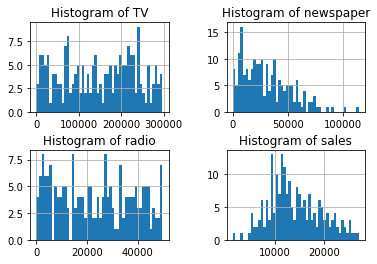

In [9]:
fig,axes = plt.subplots(2,2)
df.hist(column='TV',ax=axes[0,0],bins=50)
axes[0,0].set_title('Histogram of TV')
#axes[0,0].set_xlabel('total_bill')

df.hist(column='newspaper',ax=axes[0,1],bins=50)
axes[0,1].set_title('Histogram of newspaper')
#axes[0,1].set_xlabel('tip')

df.hist(column='radio',ax=axes[1,0],bins=50)
axes[1,0].set_title('Histogram of radio')
#axes[1,0].set_xlabel('size')

df.hist(column='sales',ax=axes[1,1],bins=50)
axes[1,1].set_title('Histogram of sales')
#axes[1,1].set_xlabel('tip_pct')

plt.subplots_adjust(wspace=0.42,hspace=0.42)

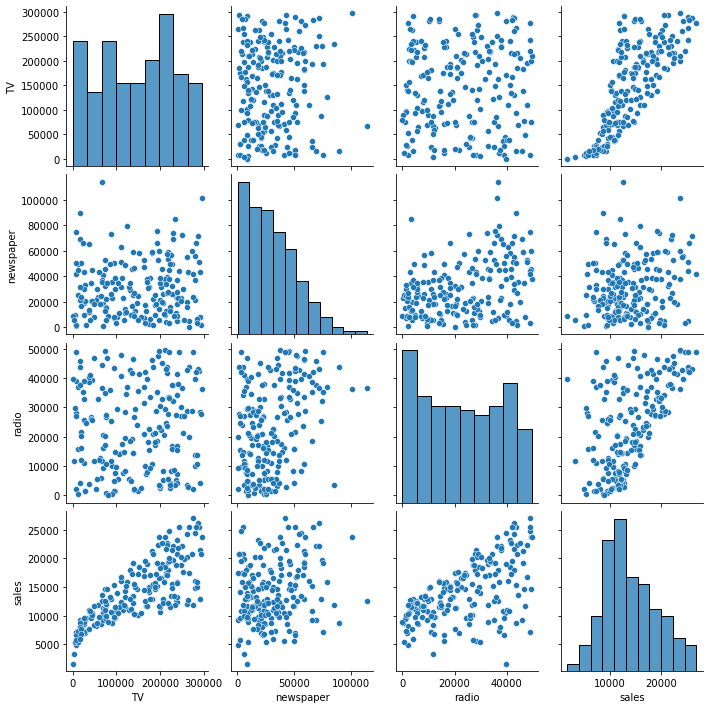

In [10]:
sns.pairplot(df)

In [11]:
df.corr()

,TV,newspaper,radio,sales
TV,1.000000,0.056648,0.054809,0.782224
newspaper,0.056648,1.000000,0.354104,0.228299
radio,0.054809,0.354104,1.000000,0.576223
sales,0.782224,0.228299,0.576223,1.000000


In [12]:
#根據圖表可以看到當 TV 的觸及數上升時，sales也呈現一個明顯的正相關上升
#newspaper在觸及數低於大約5000時，也能夠有效的提升sales，但是在更往上的情況相關性就有明顯的下降
#radio也跟sales也能夠表現出一個明顯的正相關上升，但是相較於TV 和sales的關係就沒有那麼的明顯

In [13]:
df = pd.read_csv('/Users/xwlee/Desktop/ECt/hw2/Advertising.csv')
df['Date']=pd.to_datetime(df['Date'],format= '%Y/%m/%d', errors = 'coerce')
df.head()

,Date,TV,newspaper,radio,sales
0,2018-01-01,230100.0,69200.0,37800.0,22100.0
1,2018-01-02,44500.0,45100.0,39300.0,10400.0
2,2018-01-03,17200.0,69300.0,45900.0,9300.0
3,2018-01-04,151500.0,58500.0,41300.0,18500.0
4,2018-01-05,180800.0,58400.0,10800.0,12900.0


In [14]:
df = df.set_index('Date')
dfM=df.resample('M').sum()
dfM.reset_index(inplace=True)
dfM['Date'] = dfM['Date'].dt.strftime('%Y/%m') 
dfM = dfM.set_index('Date')
dfM.head()

,TV,newspaper,radio,sales
Date,,,,
2018/01,4404000.0,1173100.0,753900.0,424900.0
2018/02,4693800.0,824900.0,696600.0,434200.0
2018/03,3909100.0,923200.0,799900.0,428900.0
2018/04,4823300.0,1022600.0,649700.0,440700.0
2018/05,3973700.0,926200.0,800300.0,410000.0


In [15]:
dfM = dfM.drop(['sales'], axis=1)

Text(0.5, 1.0, '2018/07')

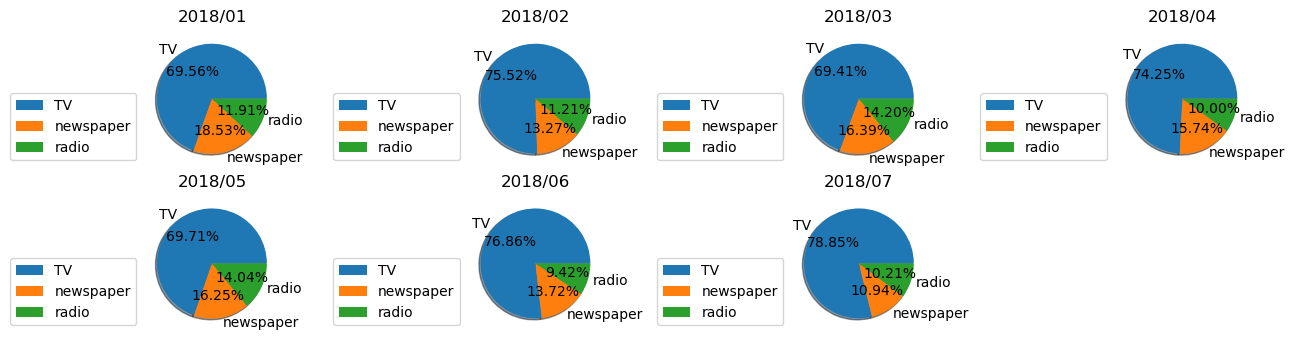

In [16]:
pic2 = plt.figure(figsize=(16,4),dpi=100) #新建畫布，由於需要在畫布上增加子圖，所以講新建的畫布賦值一個變量名 
mtd = ['TV','newspaper','radio'] 
fig1 = pic2.add_subplot(2,4,1) #第一個子圖（行數，列數，本子圖位置） 
plt.pie(dfM.iloc[0,0:] #選取數據源 
        ,labels= mtd
        ,autopct='%.2f%%' #設置百分比精度 
        ,shadow=True) #顯示陰影，增加立體感
plt.legend(loc = 4, bbox_to_anchor=(0, 0))
plt.title('2018/01',fontsize=12)#設置子圖的名稱 
        
fig2 = pic2.add_subplot(2,4,2) #第一個子圖（行數，列數，本子圖位置） 
plt.pie(dfM.iloc[1,0:] #選取數據源 
        ,labels= mtd
        ,autopct='%.2f%%' #設置百分比精度 
        ,shadow=True) #顯示陰影，增加立體感 
plt.legend(loc = 4, bbox_to_anchor=(0, 0))       
plt.title('2018/02',fontsize=12)#設置子圖的名稱 
        
fig3 = pic2.add_subplot(2,4,3) #第一個子圖（行數，列數，本子圖位置） 
plt.pie(dfM.iloc[2,0:] #選取數據源 
        ,labels= mtd 
        ,autopct='%.2f%%' #設置百分比精度 
        ,shadow=True) #顯示陰影，增加立體感 
plt.legend(loc = 4, bbox_to_anchor=(0, 0))       
plt.title('2018/03',fontsize=12)#設置子圖的名稱 
        
fig4 = pic2.add_subplot(2,4,4) #第一個子圖（行數，列數，本子圖位置） 
plt.pie(dfM.iloc[3,0:] #選取數據源 
        ,labels= mtd
        ,autopct='%.2f%%' #設置百分比精度 
        ,shadow=True) #顯示陰影，增加立體感 
plt.legend(loc = 4, bbox_to_anchor=(0, 0))        
plt.title('2018/04',fontsize=12)#設置子圖的名稱 

fig5 = pic2.add_subplot(2,4,5) #第一個子圖（行數，列數，本子圖位置） 
plt.pie(dfM.iloc[4,0:] #選取數據源 
        ,labels= mtd
        ,autopct='%.2f%%' #設置百分比精度 
        ,shadow=True) #顯示陰影，增加立體感 
plt.legend(loc = 4, bbox_to_anchor=(0, 0))       
plt.title('2018/05',fontsize=12)#設置子圖的名稱 
        
fig6 = pic2.add_subplot(2,4,6) #第一個子圖（行數，列數，本子圖位置） 
plt.pie(dfM.iloc[5,0:] #選取數據源 
        ,labels= mtd
        ,autopct='%.2f%%' #設置百分比精度 
        ,shadow=True) #顯示陰影，增加立體感 
plt.legend(loc = 4, bbox_to_anchor=(0, 0))       
plt.title('2018/06',fontsize=12)#設置子圖的名稱 
        
fig2 = pic2.add_subplot(2,4,7) #第一個子圖（行數，列數，本子圖位置） 
plt.pie(dfM.iloc[6,0:] #選取數據源 
        ,labels= mtd
        ,autopct='%.2f%%' #設置百分比精度 
        ,shadow=True)#顯示陰影，增加立體感 
plt.legend(loc = 4, bbox_to_anchor=(0, 0))       
plt.title('2018/07',fontsize=12)#設置子圖的名稱 

In [17]:
dfM.head()

,TV,newspaper,radio
Date,,,
2018/01,4404000.0,1173100.0,753900.0
2018/02,4693800.0,824900.0,696600.0
2018/03,3909100.0,923200.0,799900.0
2018/04,4823300.0,1022600.0,649700.0
2018/05,3973700.0,926200.0,800300.0


In [18]:
fields=['TV','newspaper','radio']
for i in fields:
    dfM['{}_Percent'.format(i)] = dfM[i] / dfM.sum(axis=1)
dfM = dfM.drop(['TV','newspaper','radio'], axis=1)

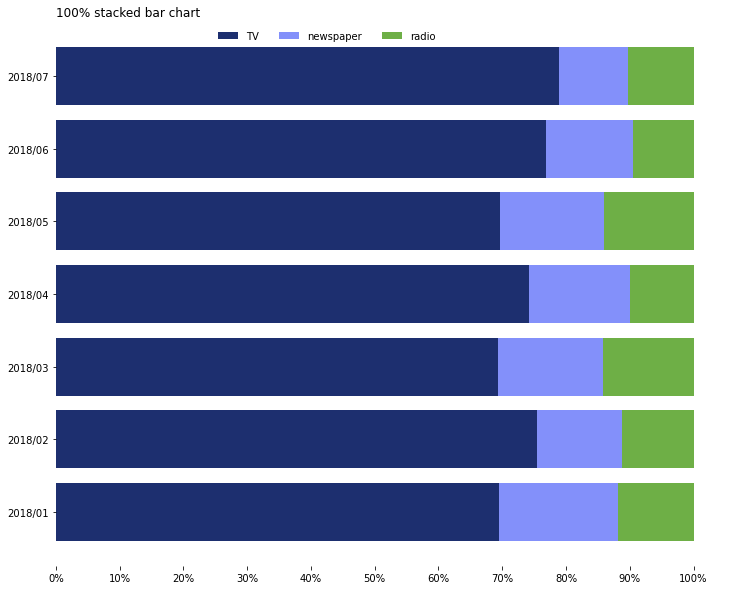

In [19]:
# variables
labels = ['TV', 'newspaper', 'radio']
colors = ['#1D2F6F', '#8390FA', '#6EAF46']
title = '100% stacked bar chart'

def plot_stackedbar_p(dfM, labels, colors, title):
    fields = dfM.columns.tolist()

    # figure and axis
    fig, ax = plt.subplots(1, figsize=(12, 10))
   
    # plot bars
    left = len(dfM) * [0]
    for idx, name in enumerate(fields):
        plt.barh(dfM.index, dfM[name], left = left, color=colors[idx])
        left = left + dfM[name]
# title 
    plt.title(title, loc='left')
    
# legend
    plt.legend(labels, bbox_to_anchor=([0.58, 1, 0, 0]), ncol=4, frameon=False)
    
# remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
# format x ticks
    xticks = np.arange(0,1.1,0.1)
    xlabels = ['{}%'.format(i) for i in np.arange(0,101,10)]
    plt.xticks(xticks, xlabels)
    
plt.show()

plot_stackedbar_p(dfM, labels, colors, title)

In [20]:
dfM=df.resample('M').sum()
dfM.reset_index(inplace=True)
dfM['Date'] = dfM['Date'].dt.strftime('%Y/%m') 

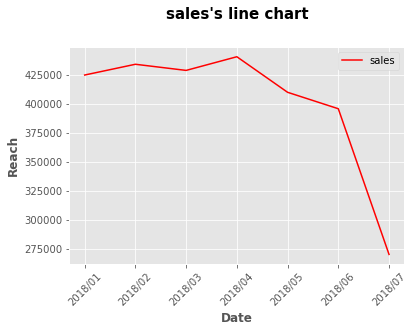

In [21]:
ym = [None] * len(dfM["Date"])     # 建立一個空列表，數量為Date的數量

# 以for迴圈逐一將年月資料類別轉成字串類別
for i in range(len(dfM["Date"])):  
    ym[i] = str(dfM["Date"][i])
    
dfM["Date"] = ym 


plt.style.use("ggplot")               # 使用ggplot主題樣式

#畫第一條線，plt.plot(x, y, c)參數分別為x軸資料、y軸資料及線顏色 = 紅色
plt.plot(dfM["Date"], dfM["sales"],c = "r")  


# 設定圖例，參數為標籤、位置
plt.legend(labels=["sales"], loc = 'best')
plt.xlabel("Date", fontweight = "bold")                # 設定x軸標題及粗體
plt.ylabel("Reach", fontweight = "bold")    # 設定y軸標題及粗體
plt.title("sales's line chart", fontsize = 15, fontweight = "bold", y = 1.1)   # 設定標題、文字大小、粗體及位置
plt.xticks(rotation=45)   # 將x軸數字旋轉45度，避免文字重疊

plt.show()

In [22]:
dfM.head()

,Date,TV,newspaper,radio,sales
0,2018/01,4404000.0,1173100.0,753900.0,424900.0
1,2018/02,4693800.0,824900.0,696600.0,434200.0
2,2018/03,3909100.0,923200.0,799900.0,428900.0
3,2018/04,4823300.0,1022600.0,649700.0,440700.0
4,2018/05,3973700.0,926200.0,800300.0,410000.0


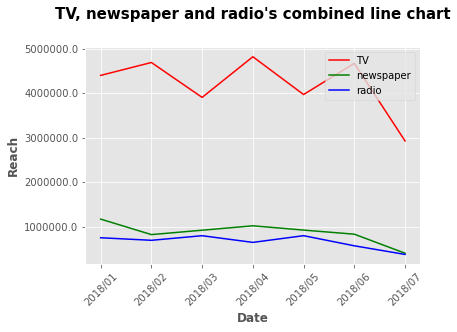

In [23]:
import matplotlib.ticker as ticker
ym = [None] * len(dfM["Date"])     # 建立一個空列表，數量為Date的數量

# 以for迴圈逐一將年月資料類別轉成字串類別
for i in range(len(dfM["Date"])):  
    ym[i] = str(dfM["Date"][i])
    
dfM["Date"] = ym 


plt.style.use("ggplot")               # 使用ggplot主題樣式

#畫第一條線，plt.plot(x, y, c)參數分別為x軸資料、y軸資料及線顏色 = 紅色
plt.plot(dfM["Date"], dfM["TV"],c = "r")
plt.plot(dfM["Date"], dfM["newspaper"],c = "g")  
plt.plot(dfM["Date"], dfM["radio"],c = "b")  


# 設定圖例，參數為標籤、位置
plt.legend(labels=["TV","newspaper","radio"], loc = 1)
plt.xlabel("Date", fontweight = "bold")                # 設定x軸標題及粗體
plt.ylabel("Reach", fontweight = "bold")    # 設定y軸標題及粗體
plt.title("TV, newspaper and radio's combined line chart", fontsize = 15, fontweight = "bold", y = 1.1)   # 設定標題、文字大小、粗體及位置
plt.xticks(rotation=45)   # 將x軸數字旋轉45度，避免文字重疊
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))

plt.show()

In [24]:
from glob import glob
files = glob("/Users/xwlee/Desktop/ECt/hw2/2/sales*.csv")

df = pd.concat([pd.read_csv(f) for f in files])
df.reset_index(drop=True)

,Year,Product line,Product type,Product,Order method type,Retailer country,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
0,2007,Camping Equipment,Cooking Gear,TrailChef Deluxe Cook Set,Sales visit,Japan,165744.35,174473.40,107008.20,1345.0,79.56,129.72,58736.15,123.230000
1,2007,Camping Equipment,Cooking Gear,TrailChef Deluxe Cook Set,Sales visit,Singapore,75416.76,79388.64,48690.72,612.0,79.56,129.72,26726.04,123.230000
2,2007,Camping Equipment,Cooking Gear,TrailChef Deluxe Cook Set,Sales visit,France,173014.92,182126.88,111702.24,1404.0,79.56,129.72,61312.68,123.230000
3,2007,Camping Equipment,Cooking Gear,TrailChef Deluxe Cook Set,Sales visit,Austria,43376.96,45661.44,28005.12,352.0,79.56,129.72,15371.84,123.230000
4,2007,Camping Equipment,Cooking Gear,TrailChef Deluxe Cook Set,Web,United States,1593610.36,1677539.04,1028869.92,12932.0,79.56,129.72,564740.44,123.230000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5855,2005,Camping Equipment,Sleeping Bags,Hibernator,Mail,United States,184118.68,195871.22,114724.00,1334.0,86.00,146.83,69394.68,138.020000
5856,2005,Camping Equipment,Sleeping Bags,Hibernator,Fax,United States,72598.52,77232.58,45236.00,526.0,86.00,146.83,27362.52,138.020000
5857,2006,Camping Equipment,Sleeping Bags,Hibernator,Telephone,United States,70860.92,74589.64,43688.00,508.0,86.00,146.83,27172.92,139.490000
5858,2006,Camping Equipment,Sleeping Bags,Hibernator,Web,United States,2858284.19,2982264.13,1746746.00,20311.0,86.00,146.83,1111538.19,140.866250


In [25]:
freq = df.groupby(['Product line']).count() 
print(freq)

                          Year  Product type  Product  Order method type  Retailer country  Revenue  Planned revenue  Product cost  Quantity  Unit cost  Unit price  Gross profit  Unit sale price
Product line                                                                                                                                                                                      
Camping Equipment         2912          2912     2912               2912              2912     2912             2912          2912      2912       2912        2912          2912             2912
Golf Equipment             615           615      615                615               615      615              615           615       615        615         615           615              615
Mountaineering Equipment   729           729      729                729               729      729              729           729       729        729         729           729              729
Outdoor Protection       

In [26]:
dfT=df.groupby(['Retailer country'])['Revenue'].agg('sum')
print(dfT)

Retailer country
Australia         1.441897e+07
Austria           1.536226e+07
Belgium           1.335291e+07
Brazil            1.583751e+07
Canada            3.682538e+07
China             4.090920e+07
Denmark           7.947803e+06
Finland           2.553192e+07
France            3.390698e+07
Germany           3.307413e+07
Italy             2.446368e+07
Japan             4.327536e+07
Korea             2.991737e+07
Mexico            2.498386e+07
Netherlands       2.362475e+07
Singapore         2.713914e+07
Spain             2.230262e+07
Sweden            9.143315e+06
Switzerland       1.008921e+07
United Kingdom    3.764171e+07
United States     1.010946e+08
Name: Revenue, dtype: float64


In [27]:
#revenue 大於 30,000,000的國家：Canada;China;France;Germany;Japan;United Kingdom;United States

In [28]:
df['Year']=pd.to_datetime(df['Year'],format= '%Y', errors = 'coerce')
df['Year'] = df['Year'].dt.strftime('%Y')
df_Year_Product = df.pivot_table(index=['Year','Product'], values=['Revenue','Planned revenue','Product cost','Quantity','Unit cost','Unit price','Gross profit','Unit sale price'], margins=True, aggfunc='sum')
print(df_Year_Product)

                             Gross profit  Planned revenue  Product cost    Quantity       Revenue      Unit cost  Unit price  Unit sale price
Year Product                                                                                                                                  
2004 Aloe Relief             2.745980e+05     4.365478e+05  1.604602e+05     83573.0  4.355972e+05     119.040000      324.26       323.489050
     BugShield Extreme       5.395789e+06     8.984774e+06  3.190054e+06   1318204.0  8.828496e+06     154.880000      448.00       417.441500
     BugShield Lotion        1.646736e+06     2.616700e+06  8.843282e+05    379540.0  2.571144e+06     146.790000      441.00       423.498649
     BugShield Lotion Lite   9.232532e+05     1.292183e+06  3.534005e+05    187979.0  1.300323e+06      99.640000      371.00       362.209940
     BugShield Natural       2.316472e+06     3.573189e+06  1.134686e+06    610046.0  3.538245e+06     115.320000      372.00       352.385386

In [29]:
df_Year_Product.reset_index(inplace=True)
max_Quantity_idx = df_Year_Product.groupby('Year')['Quantity'].idxmax()  # 2, 12, 26
max_Quantity_Products = df_Year_Product['Product'].iloc[max_Quantity_idx]  # '1', '2', '3'
Years = sorted(df_Year_Product['Year'].unique())  # 'a', 'b', 'c'

result = pd.concat(
    [df_Year_Product.loc[(df_Year_Product['Year'] ==Years) & (df_Year_Product['Product'] == max_Quantity_Products), :] 
     for Years, max_Quantity_Products in zip(Years,max_Quantity_Products)]
)
result = result.set_index(['Year', 'Product'])
print(result)

                          Gross profit  Planned revenue  Product cost    Quantity       Revenue      Unit cost  Unit price  Unit sale price
Year Product                                                                                                                               
2004 BugShield Extreme    5.395789e+06     8.984774e+06  3.190054e+06   1318204.0  8.828496e+06     154.880000      448.00       417.441500
2005 TrailChef Water Bag  3.083933e+06     6.460175e+06  2.941961e+06   1124877.0  6.978659e+06     179.720913      428.35       375.908477
2006 TrailChef Water Bag  3.608610e+06     7.374568e+06  3.358394e+06   1260914.0  7.901859e+06     131.015671      309.73       276.659279
2007 TrailChef Water Bag  2.469268e+06     5.279053e+06  2.502281e+06    947501.0  5.936527e+06     104.784387      243.83       213.776703
All                       2.438596e+08     5.994302e+08  3.260423e+08  27490863.0  5.908427e+08  143240.416935   271954.71    249225.090629


In [30]:
df_Year_Product['Gross margin'] = df_Year_Product.apply(lambda x: (x['Unit price'] - x['Unit cost'])/x['Unit price'], axis=1)
print(df_Year_Product)

     Year                 Product  Gross profit  Planned revenue  Product cost    Quantity       Revenue      Unit cost  Unit price  Unit sale price  Gross margin
0    2004             Aloe Relief  2.745980e+05     4.365478e+05  1.604602e+05     83573.0  4.355972e+05     119.040000      324.26       323.489050      0.632887
1    2004       BugShield Extreme  5.395789e+06     8.984774e+06  3.190054e+06   1318204.0  8.828496e+06     154.880000      448.00       417.441500      0.654286
2    2004        BugShield Lotion  1.646736e+06     2.616700e+06  8.843282e+05    379540.0  2.571144e+06     146.790000      441.00       423.498649      0.667143
3    2004   BugShield Lotion Lite  9.232532e+05     1.292183e+06  3.534005e+05    187979.0  1.300323e+06      99.640000      371.00       362.209940      0.731429
4    2004       BugShield Natural  2.316472e+06     3.573189e+06  1.134686e+06    610046.0  3.538245e+06     115.320000      372.00       352.385386      0.690000
..    ...             